In [56]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [59]:
resolutions = pd.read_csv("processed_data/dataset_resolution.csv")
resolutions.columns = ["path", "axis"]

In [60]:
resolutions["axis"] = resolutions.axis.apply(lambda x: literal_eval(x))
resolutions[["x_axis", "y_axis", "z_axis"]] = pd.DataFrame(resolutions['axis'].tolist(), index=resolutions.index)
resolutions = resolutions[["path", "x_axis", "y_axis", "z_axis"]]

In [72]:
resolutions.describe()

,x_axis,y_axis,z_axis
count,488.000000,488.000000,488.000000
mean,0.695036,0.695036,1.621158
std,0.096252,0.096252,0.752327
min,0.513672,0.513672,0.500000
25%,0.617188,0.617188,1.000000
50%,0.697266,0.697266,1.250000
75%,0.742188,0.742188,2.500000
max,0.976562,0.976562,2.500000


In [121]:
resolutions["x_axis"].dtypes is float

False

In [137]:
def plot_hist(res:pd.DataFrame):
        for col in res.columns:
                if res[col].dtypes != float:
                        continue
                plt.hist(res[col], bins=30)
                plt.title(f"{col}")
                plt.show()

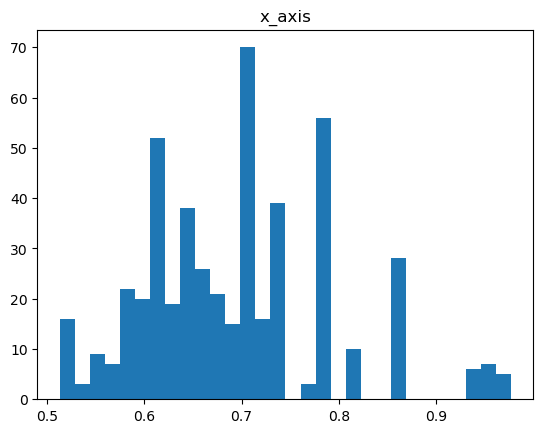

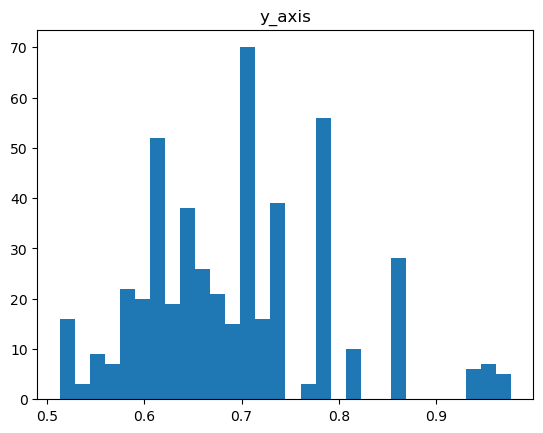

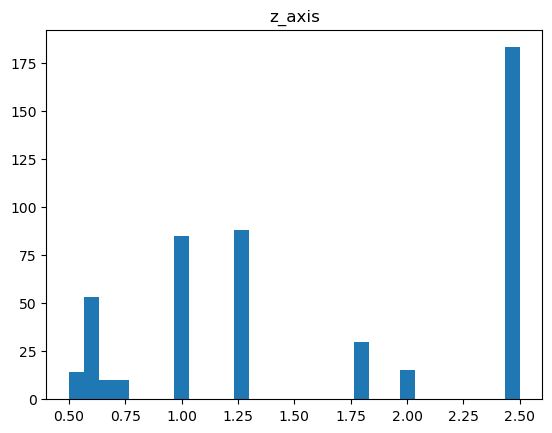

In [138]:
plot_hist(resolutions)

In [139]:
resolutions[resolutions.z_axis > 2].describe()

,x_axis,y_axis,z_axis
count,183.000000,183.000000,183.0
mean,0.713371,0.713371,2.5
std,0.089304,0.089304,0.0
min,0.556641,0.556641,2.5
25%,0.644531,0.644531,2.5
50%,0.703125,0.703125,2.5
75%,0.781250,0.781250,2.5
max,0.976562,0.976562,2.5


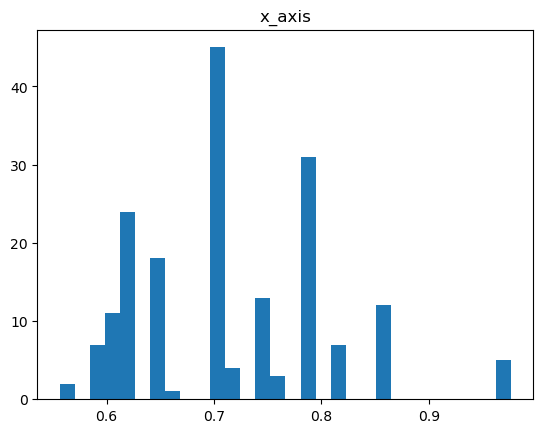

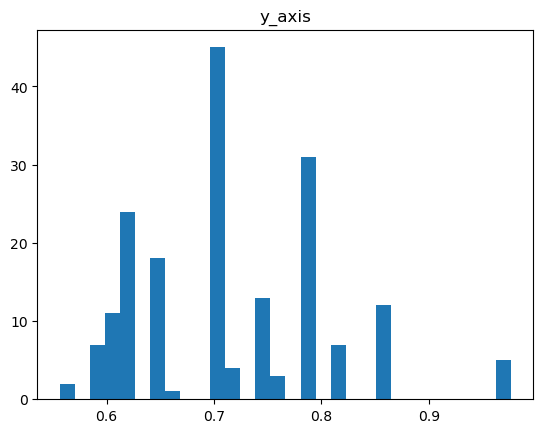

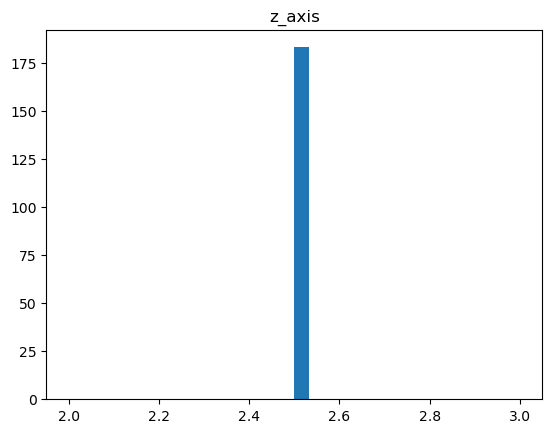

In [140]:
plot_hist(resolutions[resolutions.z_axis > 2])

In [91]:
import os
import SimpleITK as sitk

DATA = "../data/"
SCAN_PATH = DATA + "subset1"

list_of_files = [file for file in os.listdir(SCAN_PATH) if file.endswith("mhd")]

In [92]:
list_of_files

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.108231420525711026834210228428.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.111017101339429664883879536171.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.113697708991260454310623082679.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.121824995088859376862458155637.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.128059192202504367870633619224.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.128881800399702510818644205032.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.134370886216012873213579659366.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.139595277234735528205899724196.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.140527383975300992150799777603.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.144943344795414

In [95]:
s1_ = []
for path in list_of_files:
        file_path = os.path.join(SCAN_PATH, path)
        s = sitk.ReadImage(file_path)
        s1_.append((file_path, s.GetSpacing()))

In [97]:
resolutions_s1 = pd.DataFrame(s1_, columns=["path", "axis"])

In [103]:
resolutions_s1[["x_axis", "y_axis", "z_axis"]] = pd.DataFrame(resolutions_s1['axis'].tolist(), index=resolutions_s1.index)
resolutions_s1 = resolutions_s1[["path", "x_axis", "y_axis", "z_axis"]]

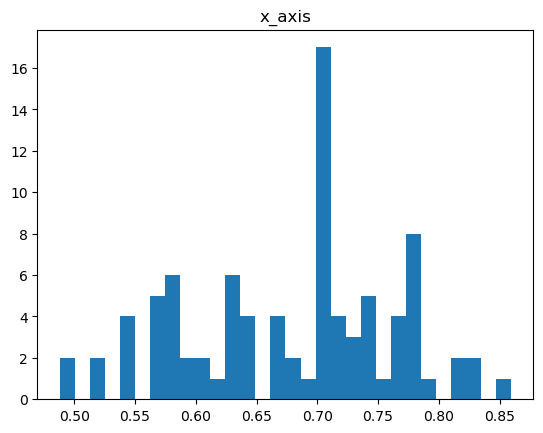

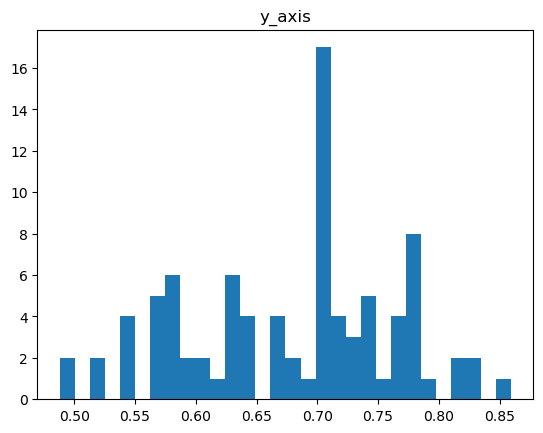

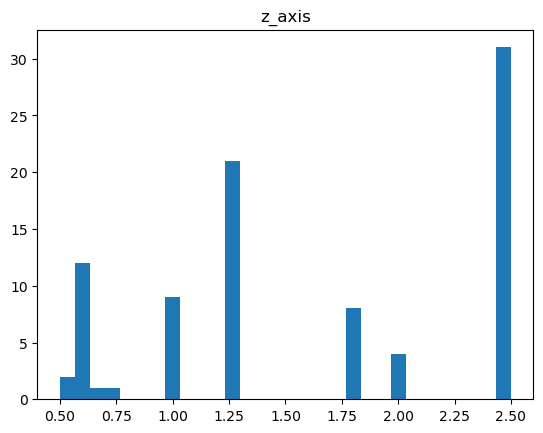

In [142]:
plot_hist(resolutions_s1)

In [146]:
resolutions_s1[resolutions_s1.z_axis > 2].describe()

,x_axis,y_axis,z_axis
count,31.000000,31.000000,3.100000e+01
mean,0.716419,0.716419,2.500000e+00
std,0.075002,0.075002,4.282124e-08
min,0.564453,0.564453,2.500000e+00
25%,0.683594,0.683594,2.500000e+00
50%,0.722656,0.722656,2.500000e+00
75%,0.781250,0.781250,2.500000e+00
max,0.859375,0.859375,2.500000e+00


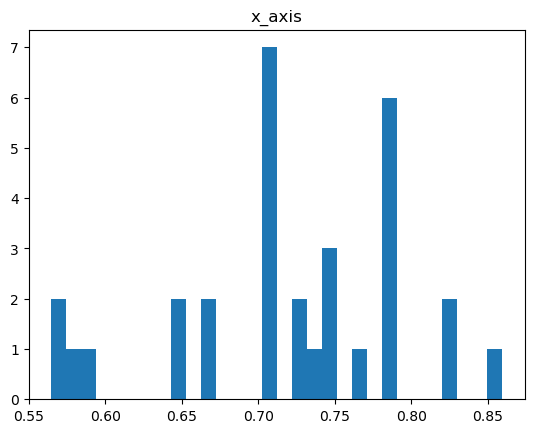

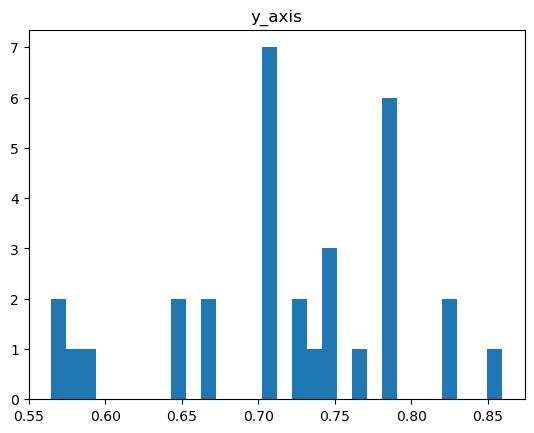

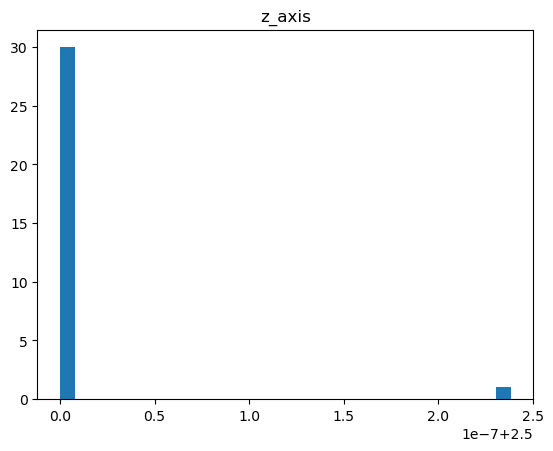

In [151]:
plot_hist(resolutions_s1[resolutions_s1.z_axis > 2])